In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np
import lbg_forecast.nz as nz
import lbg_forecast.emulator as em
import lbg_forecast.hyperparameters as hyp
import lbg_forecast.population_model as pop
import lbg_forecast.priors as pr
import matplotlib.pyplot as plt
import scipy as sc

In [3]:
# initalise fsps emulator
model = em.fsps_emulator("/Users/fpetri/repos/LBGforecast")

In [4]:
# nz histogram parameters
dz = 0.1
minz = 0.0
maxz = 7.0

bins = np.arange(minz, maxz, dz)

In [5]:
bounds = hyp.hyperparameter_tighter()
nhypersamples = 50
hyperparameter_samples = np.vsplit(hyp.sample_prior_parameters(nhypersamples, bounds[0], bounds[1]), nhypersamples)

In [6]:
prior_data = pr.preload_prior_data(zmax=7.0)

In [7]:
nsamples = 500000
nzs = []
spsp = []
for row in hyperparameter_samples:
    sps_params = pop.generate_sps_parameters(nsamples, row[0], prior_data, uniform_redshift_mass=False, uniform_logf=False)
    lbg_nzs = nz.simulate_nzs(sps_params, model, 1000)
    nzs.append(lbg_nzs)
    spsp.append(sps_params)

/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/envs/tf_env/lib/python3.11/site-packages/speculator/speculator.py:709: RuntimeWarning: overflow encountered in exp
  layers.append((self.betas_[i] + (1.-self.betas_[i])*1./(1.+np.exp(-self.alphas_[i]*act[-1])))*act[-1])
/Users/fpetri/anaconda3/

In [8]:
nzs[0][0][0]

array([0.43257701, 0.63231917, 3.29825431, 3.18398193, 3.52486927,
       2.36741517, 1.96913924, 0.22207884, 3.347514  , 3.25619641,
       3.19297294, 3.21831244, 0.14800861, 2.7795829 , 0.03372753,
       0.7879664 , 1.18429342, 3.14634246, 0.56269446, 3.27591097,
       3.33902463, 2.16312072, 2.84547768, 2.36987179, 3.24435039,
       3.2888625 , 3.25255974, 3.20449161, 0.71517804, 0.21487835,
       3.39187276, 3.13740286, 0.13091998, 1.93814263, 0.14197374,
       2.47121081, 2.62789549, 0.36671669, 2.85090881, 3.06051627,
       3.15967114, 3.34819658, 3.15967114, 3.21209594, 0.03470008,
       2.96262455, 2.5850125 , 0.08613698, 3.13899437, 3.1273516 ,
       0.13731006, 0.22101496, 2.81529465, 3.15077999, 3.06887258,
       3.06887258, 0.10352167, 3.33621279, 0.15715016, 0.66052566,
       2.78126734, 3.17290487, 2.94046747, 1.80647909, 0.05633542,
       3.01858997, 3.45416962, 1.74669241, 0.03964357, 3.22041888,
       3.48753195, 2.93069587, 0.39056456, 3.33719096, 3.43594

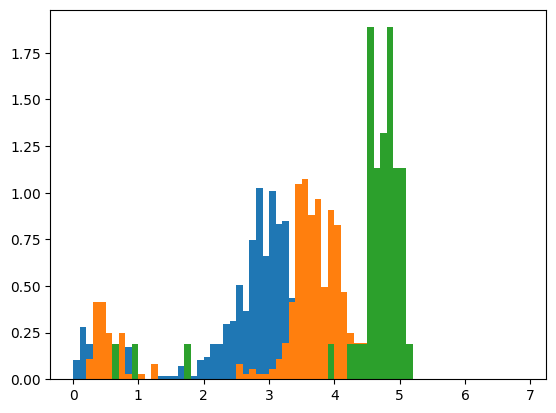

In [15]:
indx = 6
hist = plt.hist(nzs[indx][0][0], density=True, bins=bins)
hist = plt.hist(nzs[indx][1][0], density=True, bins=bins)
hist = plt.hist(nzs[indx][2][0], density=True, bins=bins)

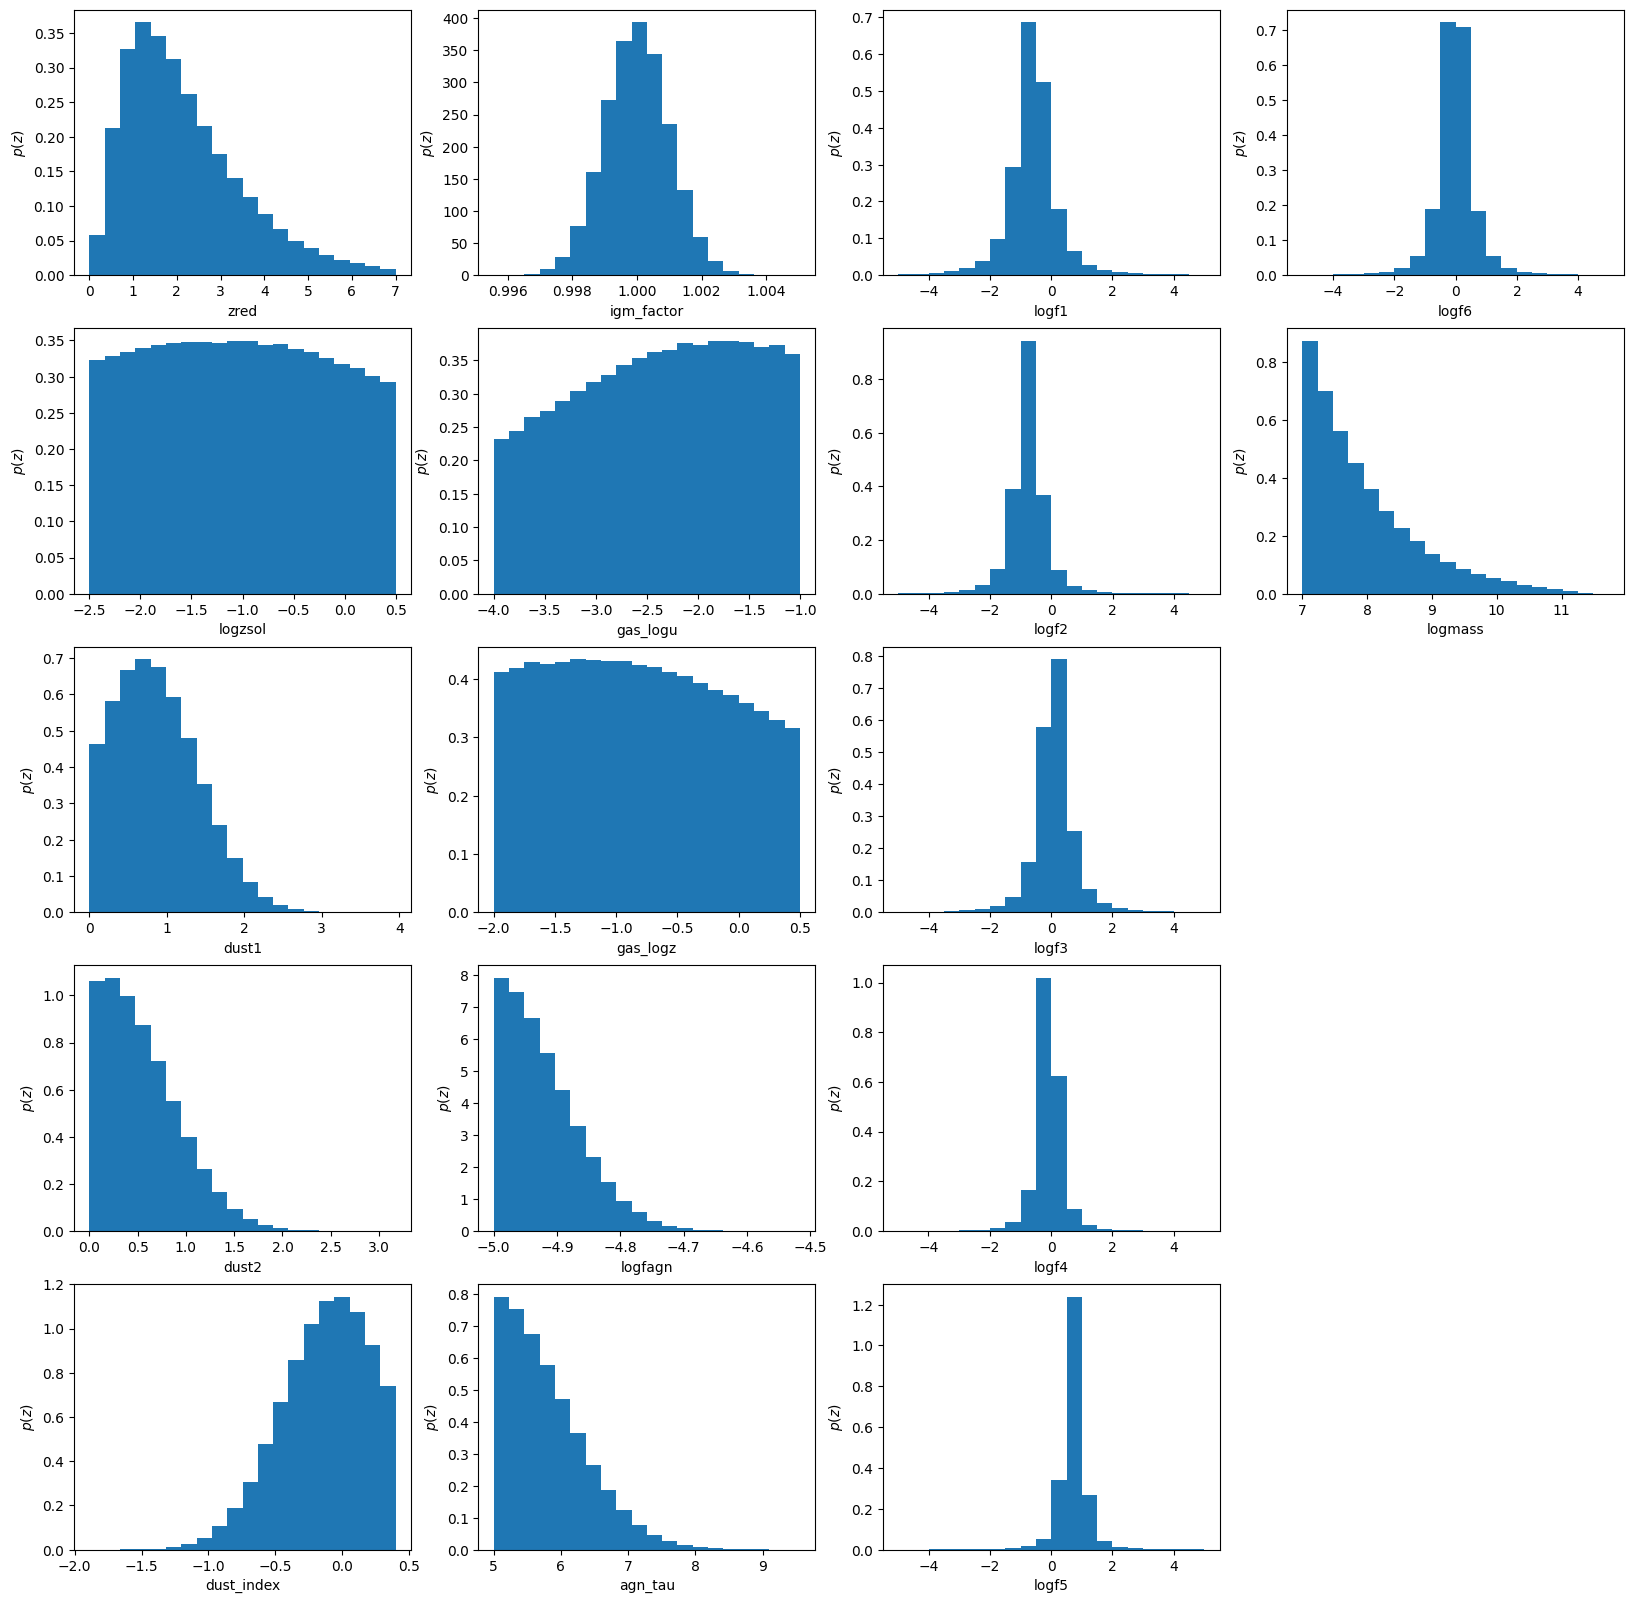

In [10]:
pop.plot_galaxy_population(spsp[indx])

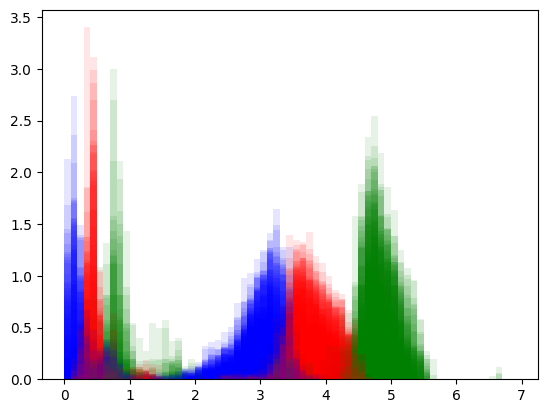

In [11]:
for ind in range(nhypersamples):
    hist = plt.hist(nzs[ind][0][0], density=True, bins=bins, alpha = 0.1, color='blue')
    hist = plt.hist(nzs[ind][1][0], density=True, bins=bins, alpha = 0.1, color='red')
    hist = plt.hist(nzs[ind][2][0], density=True, bins=bins, alpha = 0.1, color='green')

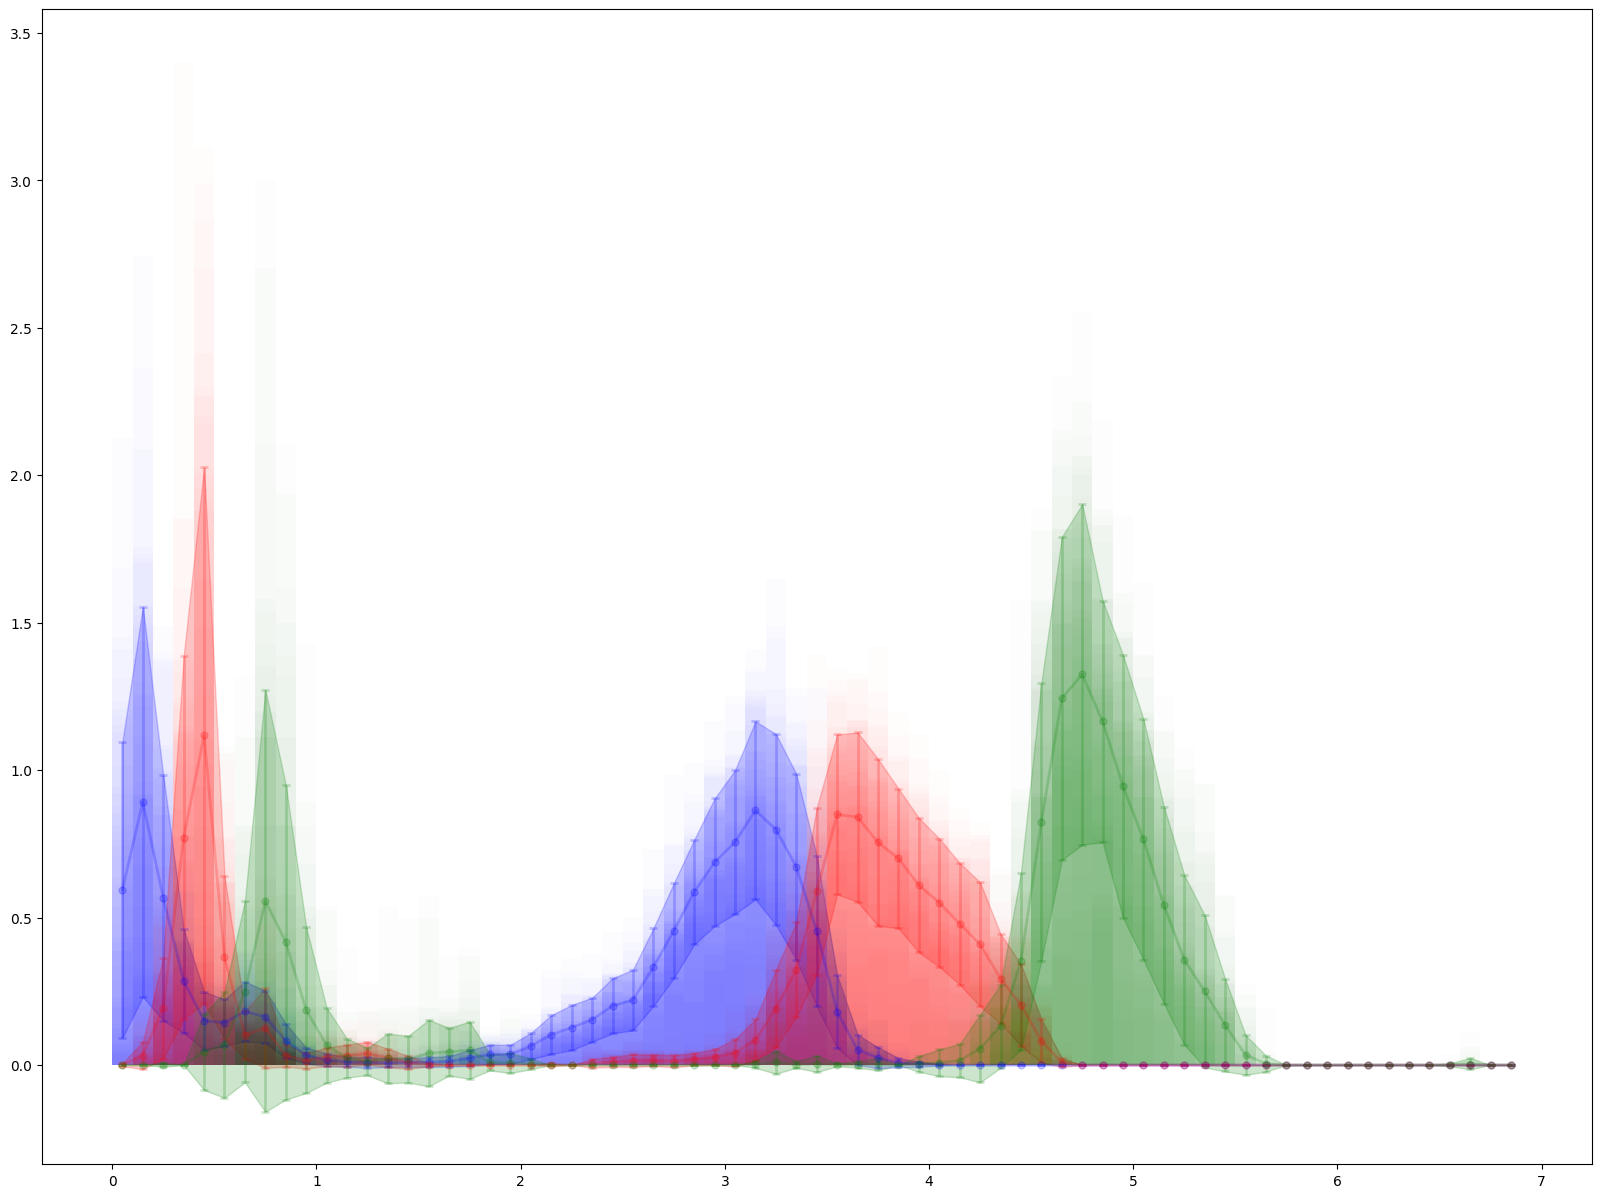

In [12]:
fig1, axes = plt.subplots(1, 1, figsize=(20,15), sharex=False, sharey=False)

colours = ['blue', 'red', 'green']
for drop in range(3):

    values = []
    x = []
    for ind in range(nhypersamples):
        hist = axes.hist(nzs[ind][drop][0], density=True, bins=bins, alpha = 0.01, color=colours[drop])
        values.append(hist[0])
        x.append(hist[1])

    values = np.hstack((np.array(values)))
    x = np.array(x)
    x = np.hstack(((x+0.05)[:,:-1]))


    bin_means, bin_edges, binnumber = sc.stats.binned_statistic(x, values, 'mean', bins=bins)
    bin_std, bin_edges, binnumber = sc.stats.binned_statistic(x, values, 'std', bins=bins)
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2

    axes.errorbar(bin_centers, bin_means, bin_std, alpha=0.2, ms=10, marker=".", elinewidth=2, capsize=3, capthick=2, lw=2, color=colours[drop])
    axes.fill_between(bin_centers, bin_means-bin_std, bin_means+bin_std, alpha=0.2, color=colours[drop])

[100.0, 87.0, 100.0, 78.0, 167.0, 60.0, 100.0, 108.0, 72.0, 108.0, 87.0, 124.0, 175.0, 113.0, 115.0, 93.0, 96.0, 68.0, 110.0, 157.0, 147.0, 124.0, 85.0, 105.0, 92.0, 153.0, 129.0, 144.0, 173.0, 32.0, 159.0, 164.0, 68.0, 93.0, 100.0, 129.0, 56.0, 97.0, 143.0, 138.0, 99.0, 125.0, 166.0, 112.0, 99.0, 142.0, 80.0, 175.0, 94.0, 169.0]
[74.0, 60.0, 93.0, 64.0, 203.0, 44.0, 62.0, 47.0, 43.0, 71.0, 53.0, 97.0, 111.0, 51.0, 74.0, 98.0, 85.0, 51.0, 72.0, 114.0, 102.0, 89.0, 68.0, 99.0, 68.0, 160.0, 153.0, 101.0, 153.0, 37.0, 178.0, 126.0, 33.0, 69.0, 83.0, 123.0, 36.0, 73.0, 85.0, 103.0, 122.0, 95.0, 148.0, 96.0, 63.0, 120.0, 52.0, 197.0, 70.0, 123.0]
[5.0, 3.0, 5.0, 2.0, 14.0, 2.0, 2.0, 5.0, 2.0, 6.0, 10.0, 15.0, 10.0, 14.0, 5.0, 3.0, 10.0, 6.0, 5.0, 9.0, 17.0, 10.0, 0.0, 4.0, 6.0, 20.0, 27.0, 15.0, 16.0, 1.0, 12.0, 7.0, 2.0, 3.0, 5.0, 6.0, 1.0, 15.0, 9.0, 10.0, 14.0, 11.0, 10.0, 8.0, 4.0, 5.0, 1.0, 17.0, 17.0, 15.0]


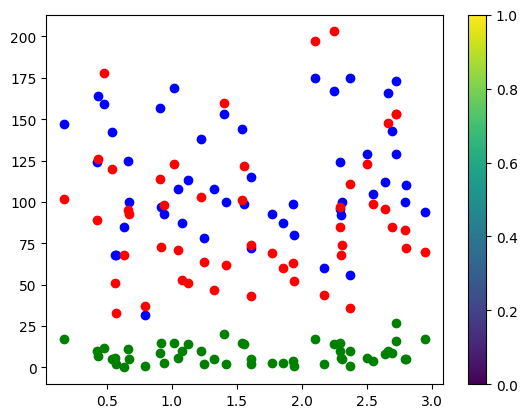

In [13]:
def calculate_interloper_fraction(nz_redshift_samples):

    nint = len(np.where(nz_redshift_samples < 1.5)[0])
    tot = nz_redshift_samples.shape[0]
    return nint/tot

def calculate_highz_fraction(sps_parameter_samples):

    n_high_z = (np.where(sps_parameter_samples[:, 0] > 2.5)[0]).shape[0]
    n_tot = sps_parameter_samples[:, 0].shape[0]

    return n_high_z/n_tot

def calculate_highm_fraction(sps_parameter_samples):
    
    n_high_m = (np.where(sps_parameter_samples[:, -1] > 10**9)[0]).shape[0]
    n_tot = sps_parameter_samples[:, -1].shape[0]

    return n_high_m/n_tot

interloper_fractions = []
hyperparameters = []
highz_fracs = []
highm_fracs = []

ndropouts = 3
colours = ['blue', 'red', 'green']
for dropout in range(ndropouts):
    hyperparameters = []
    interloper_fractions = []
    highz_fracs = []
    highm_fracs = []
    for index in range(nhypersamples):
        interloper_fractions.append(calculate_interloper_fraction(nzs[index][dropout]))
        hyperparameters.append(hyperparameter_samples[index][0][11])# 6, 7, 10, 19  sus?
        highz_fracs.append(calculate_highz_fraction(spsp[index]))
        highm_fracs.append(calculate_highm_fraction(spsp[index]))
    plt.scatter(hyperparameters, interloper_fractions, color=colours[dropout])
    #plt.scatter(highm_fracs, highz_fracs, c=interloper_fractions, cmap='Reds')
    print(interloper_fractions)
plt.colorbar()


In [14]:
np.save("nzs_test.npy", nzs)
np.save("spsp_test.npy", spsp)